# Bootstrap hypothesis testing

Efron and Tibshirani suggest the algorithm for comparing the means of two independent samples.

[An Introduction to the Bootstrap]()  
[wiki](https://en.wikipedia.org/wiki/Bootstrapping_(statistics))

1. Calculate the test statistic
   $$
   t=\frac{\bar{x}-\bar{y}}{\sqrt{\sigma_x^2/n_x+\sigma_y^2/n_y}}
   $$
1. Create two new data sets:
   $$
       \begin{aligned}
       x'_i&=x_i-\bar{x}+\bar{z} \\
       y'_i&=y_i-\bar{y}+\bar{z} \\
       \end{aligned}
   $$
   where $\bar{z}$ is the mean of the combined sample
1. Draw a random sample $x^*_i$ of size $n$ with replacement from $x'_i$ and another random sample $y^*_i$ of size $m$ with replacement from $y'_i$
1. Calculate the test statistic
   $$
   t^*=\frac{\bar{x*}-\bar{y*}}{\sqrt{\sigma_x^*2/n_x+\sigma_y^*2/n_y}}
   $$
1. Repeat 3 and 4 B times(eg B=1000) to collect B values of the test statistic.
1. Estimate the p-value as 

$$
p=\frac{count(t^*_i\geq t)}{B}
$$

Note:
The two-sample t-test for unpaired data is defined as:
$$
\begin{aligned}
H_0&:	&\mu_1&=\mu_2 \\
H_a&:	&\mu_1&≠\mu_2
\end{aligned}
$$
Test Statistic:	$T=\frac{\bar{Y_1}-\bar{Y_2}}{\sqrt{s^2_1/N_1+s^2_2/N_2}}$
where $N_1$ and $N_2$ are the sample sizes, $\bar{Y_1}$ and $\bar{Y_2}$ are the sample means, and $s^2_1$ and $s^2_2$ are the sample variances.

If equal variances are assumed, then the formula reduces to:

$T=\frac{\bar{Y_1}-\bar{Y_2}}{s_p\sqrt{1/N_1+1/N_2}}$
where
$s^2_p=\frac{(N_1−1)s^2_1+(N_2−1)s^2_2}{N_1+N_2−2}$

If variances and size are also equal, then:
$T=\frac{\bar{Y_1}-\bar{Y_2}}{s\sqrt{2/N}}$


In [402]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Population is $X ~~ N(1.12345,3.678679)$

In [403]:
population_mean = 1.12345
population_var  = 3.678679
population_size = int(1e7)
population = population_mean + population_var**0.5*np.random.randn(population_size)

Can change the population to something other than normal population

In [404]:
# population = np.random.chisquare(30,population_size)


In [405]:
population

array([ 2.4802022 ,  2.48148153,  0.91609922, ...,  0.45302583,
       -1.67868929,  4.96074674])

(array([4.900000e+01, 5.371000e+03, 1.400270e+05, 1.224542e+06,
        3.616940e+06, 3.626380e+06, 1.239035e+06, 1.421580e+05,
        5.419000e+03, 7.900000e+01]),
 array([-9.3356464 , -7.24509849, -5.15455057, -3.06400266, -0.97345474,
         1.11709317,  3.20764109,  5.29818901,  7.38873692,  9.47928484,
        11.56983275]),
 <BarContainer object of 10 artists>)

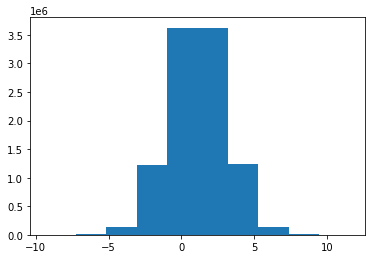

In [406]:
plt.hist(population)

Draw two sample (X and Y) from population  
X has size of 1000 and Y has size of 4000

In [407]:
size_x = 1000
size_y = 4000

sample_x = np.random.choice(population, size=size_x, replace=False)
sample_y = np.random.choice(population, size=size_y, replace=False)


In [408]:
sample_x = (population_mean-0.2) + (population_var+0.0)**0.5*np.random.randn(size_x)


(array([5.000e+00, 6.500e+01, 3.760e+02, 9.490e+02, 1.368e+03, 9.160e+02,
        2.690e+02, 4.900e+01, 2.000e+00, 1.000e+00]),
 array([-6.42637652, -4.72150384, -3.01663116, -1.31175848,  0.3931142 ,
         2.09798688,  3.80285956,  5.50773224,  7.21260492,  8.9174776 ,
        10.62235028]),
 <BarContainer object of 10 artists>)

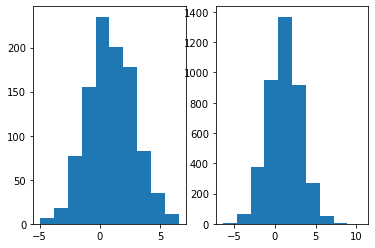

In [409]:
plt.subplot(121)
plt.hist(sample_x)
plt.subplot(122)
plt.hist(sample_y)


Test if they are from the same population

the test statistic:
$t=\frac{\bar{x}-\bar{y}}{\sqrt{\sigma_x^2/n_x+\sigma_y^2/n_y}}$

In [410]:
mean_x = np.mean(sample_x)
mean_y = np.mean(sample_y)
combined_mean = np.mean(np.concatenate([sample_x, sample_y]))

In [411]:
mean_x, mean_y

(0.9261788973061521, 1.114015944795653)

In [412]:
def single_bootstrap_sample(sample: np.ndarray):
    return np.random.choice(sample, size=len(sample), replace=True) - np.mean(sample) - combined_mean


def single_bootstrap_statistic(sample_x: np.ndarray, sample_y: np.ndarray, statistic_func):
    bootstrapped_x, bootstrapped_y = single_bootstrap_sample( sample_x), single_bootstrap_sample(sample_y)
    return statistic_func(bootstrapped_x, bootstrapped_y)


def statistic_method(sample1: np.ndarray, sample2: np.ndarray):
    statistic = (np.mean(sample1)-np.mean(sample2))/np.sqrt(np.var(sample1,
                                                                     ddof=1)/len(sample1)+np.var(sample2, ddof=1)/len(sample2))
    return statistic

In [413]:
t_statistic = statistic_method(sample_x, sample_y)
t_statistic

-2.7598711637848905

Hence, the sampled (original) t-statistic = 0.41846568534825734

In [414]:
single_bootstrap_statistic(sample_x,sample_y,statistic_method)

1.151254968092082

In [415]:
bootstrap_time = 10000
bootstrapped_t_statistics = []
for i in range(bootstrap_time):
    bootstrapped_t_statistics.append(
        single_bootstrap_statistic(sample_x, sample_y, statistic_method)
    )


In [416]:
bootstrapped_t_statistics

[-0.8822573262845049,
 0.5392389235167606,
 -0.9133575734108988,
 0.9404677489042355,
 0.09095580721171603,
 -0.34980568767244663,
 0.08740452763930362,
 0.45852905546110395,
 -0.1777315462122977,
 1.9831668096041601,
 0.09906032663266978,
 -0.3071422448477995,
 0.0850125189065359,
 1.78426095493017,
 0.674168179737279,
 0.1120548998203799,
 0.08391118276934548,
 -0.19020735701670824,
 -1.3407900683337592,
 -1.2064015073701488,
 -0.37360777957200303,
 -0.5777286912153289,
 -0.5185038970132332,
 -0.8286648152370227,
 1.3948374698798574,
 0.5483220418043574,
 0.21048986834043035,
 -1.1772874379250182,
 0.1495147911213791,
 -0.1903991650163327,
 -0.261882776754778,
 -1.1511754366229467,
 -0.6159241342435016,
 -1.7971825533421524,
 -0.6089370896251731,
 -0.7056220772969765,
 0.0982265539945296,
 0.09946164136561517,
 1.0207124846481708,
 0.7960103192631142,
 -1.788242247355663,
 1.0824925294258665,
 1.0344826051103921,
 0.4375864567991417,
 0.6002371872194248,
 -0.2902126889386341,
 0.0818

In [417]:
t_statistic

-2.7598711637848905

In [418]:
np.sum((np.abs(bootstrapped_t_statistics)>=np.abs(t_statistic)).astype(int))

60

In [419]:
(np.abs(bootstrapped_t_statistics)>=np.abs(t_statistic)).astype(int)

array([0, 0, 0, ..., 0, 0, 0])

In [420]:
np.sum(np.where(np.abs(bootstrapped_t_statistics)>=np.abs(t_statistic),1,0))

60

# two-tailed t-test

In [421]:
p_value = np.sum((np.abs(bootstrapped_t_statistics)>=np.abs(t_statistic)).astype(int))/bootstrap_time
p_value

0.006

Since p-value = 0.3345  
we cannot reject the null hypothesis and accept that X and Y have the same mean.